In [28]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import pickle
from scipy import stats
import numpy as np
import math
import pingouin as pg
import statsmodels.formula.api as smf
from datetime import datetime
from scipy.stats import gaussian_kde



# 18th of july 2025 - the sessions that are currently available are in loaded_sessions
print(loaded_sessions)
session_list = ['s02', 's04', 's05', 's06', 's07', 's08', 's09', 's10', 's11', 's12', 's13', 's14', 's15', 's18', 's23', 's24', 's25', 's26', 's27', 's28', 's29', 's31', 's32', 's33', 's34', 's35', 's36', 's37', 's38', 's41', 's43', 's44', 's45', 's46', 's48', 's49', 's52', 's54', 's55']

In [2]:
# find out what's going on with the ripples in s31 to s38, and in s45&46
#print(ripple_rates_df[ripple_rates_df['session'].isin(['s31', 's32', 's33', 's34', 's35', 's36', 's37', 's38', 's45', 's46'])])
print(ripple_rates_df[ripple_rates_df['session'].isin(['s31', 's32', 's33', 's34', 's35', 's36', 's37', 's38', 's45', 's46'])])
# looks like these are empty!!
sesh = 's10'
ripple_path = f"{result_path}/{sesh}/LFP-ripples/ripples_{sesh}.csv"
rips = pd.read_csv(ripple_path)
rips.head()

# check whats going on here! Suspicion: no hippocampal channels?

NameError: name 'ripple_rates_df' is not defined

In [ ]:
# also the result table from the previous step is empty.
#Â actually, there are loads of channels in the hippocampus, but there seems to have been a problem with the preprocessing!
channel_path = f"{result_path}/{sesh}/LFP/channels.npy"
channels_s31 = np.load(channel_path)
print(channels_s31)

['LT2aA01-001' 'LT2aA02-002' 'LT2aA03-003' 'LT2aA04-004' 'LT2aA05-005'
 'LT2aA06-006' 'LT2aA07-007' 'LT2aA08-008' 'LT2aA09-009' 'LT2aA10-010'
 'LT2aA11-011' 'LT2aA12-012' 'LT2aA13-013' 'LT2aA14-014' 'LT2bHaE01-015'
 'LT2bHaE02-016' 'LT2bHaE03-017' 'LT2bHaE04-018' 'LT2bHaE05-019'
 'LT2bHaE06-020' 'LT2bHaE07-021' 'LT2bHaE08-022' 'LT2bHaE09-023'
 'LT2cHb01-024' 'LT2cHb02-025' 'LT2cHb03-026' 'LT2cHb04-027'
 'LT2cHb05-028' 'LT2cHb06-029' 'LT2cHb07-030' 'LT2cHb08-031'
 'LT2cHb09-032' 'LT1cPulv01-033' 'LT1cPulv02-034' 'LT1cPulv03-035'
 'LT1cPulv04-036' 'LT1cPulv05-037' 'LT1cPulv06-038' 'LT1cPulv07-039'
 'LT1cPulv08-040' 'LT1cPulv09-041' 'LT1cPulv10-042' 'LT1cPulv11-043'
 'LT1cPulv12-044' 'LT1cPulv13-045' 'LT1cPulv14-046' 'LT1cPulv15-047'
 'LT1cPulv16-048' 'LF3C01-049' 'LF3C02-050' 'LF3C03-051' 'LF3C04-052'
 'LF3C05-053' 'LF3C06-054' 'LF3C07-055' 'LF3C08-056' 'LF3C09-057'
 'RT2aHaE01-058' 'RT2aHaE02-059' 'RT2aHaE03-060' 'RT2aHaE04-061'
 'RT2aHaE05-062' 'RT2aHaE06-063' 'RT2aHaE07-064' 'RT1cCM01

AttributeError: 'dict' object has no attribute 'head'

In [11]:
# Session list
session_list = list(range(60))
result_path = "/Users/xpsy1114/Documents/projects/multiple_clocks/data/ephys_humans/derivatives"

# Check if on server
if not os.path.isdir(result_path):
    print("running on ceph")
    result_path = "/ceph/behrens/svenja/human_ABCD_ephys/derivatives"

# Data containers
power_dict = {}
ripple_events = {}
beh = {}
loaded_sessions = []

column_names = [
    'rep_correct', 't_A', 't_B', 't_C', 't_D',
    'loc_A', 'loc_B', 'loc_C', 'loc_D',
    'rep_overall', 'new_grid_onset', 'session_no', 'grid_no'
]

# Loop through sessions and only load those with all files present
for s_idx in session_list:
    sesh = f"s{s_idx:02}"

    power_path = f"{result_path}/{sesh}/LFP-ripples/ripple_power_dict_{sesh}"
    beh_path = f"{result_path}/{sesh}/cells_and_beh/all_trial_times_{s_idx:02}.csv"
    ripple_path = f"{result_path}/{sesh}/LFP-ripples/ripples_{sesh}.csv"

    if os.path.isfile(power_path) and os.path.isfile(beh_path) and os.path.isfile(ripple_path):
        # Load power
        with open(power_path, 'rb') as f:
            power_dict[sesh] = pickle.load(f)
        # Load behavior
        beh[sesh] = pd.read_csv(beh_path, header=None)
        beh[sesh].columns = column_names
        # Load ripple events
        ripple_events[sesh] = pd.read_csv(ripple_path)

        loaded_sessions.append(sesh)
    else:
        print(f"Missing files for {sesh}, skipping.")

# âœ… Summary
print(f"\nLoaded sessions ({len(loaded_sessions)}): {loaded_sessions}")

    

Missing files for s00, skipping.
Missing files for s01, skipping.
Missing files for s03, skipping.
Missing files for s06, skipping.
Missing files for s07, skipping.
Missing files for s08, skipping.
Missing files for s09, skipping.
Missing files for s10, skipping.
Missing files for s11, skipping.
Missing files for s12, skipping.
Missing files for s13, skipping.
Missing files for s14, skipping.
Missing files for s15, skipping.
Missing files for s16, skipping.
Missing files for s17, skipping.
Missing files for s18, skipping.
Missing files for s19, skipping.
Missing files for s20, skipping.
Missing files for s21, skipping.
Missing files for s22, skipping.
Missing files for s23, skipping.
Missing files for s24, skipping.
Missing files for s25, skipping.
Missing files for s26, skipping.
Missing files for s27, skipping.
Missing files for s28, skipping.
Missing files for s29, skipping.
Missing files for s30, skipping.
Missing files for s31, skipping.
Missing files for s32, skipping.
Missing fi

In [12]:
sesh = loaded_sessions[-1]
print(f"overview of ripple event table for sessions {sesh}")
print(len(ripple_events[sesh]))
ripple_events[sesh].sort_values('onset_in_secs').head()

overview of ripple event table for sessions s05
263


onset_in_secs  onset_in_samples  duration         channel grid_no  task  \
80         20.182              6046     0.022  RT2cHcEb01-141   grid1  6421   
76         20.364              6137     0.020     LT1Ha01-082   grid1  6421   
77         27.694              9802     0.024     LT1Ha01-082   grid1  6421   
78         28.614             10262     0.022    RT1bHb01-132   grid1  6421   
81         32.750             12330     0.024  RT2cHcEb01-141   grid1  6421   

          snippet  
80  8.09-55.27sec  
76  8.09-55.27sec  
77  8.09-55.27sec  
78  8.09-55.27sec  
81  8.09-55.27sec

In [13]:
sesh = loaded_sessions[-1]
print(f"overview of behavioural table for sessions {sesh}")
print(len(beh[sesh]))
beh[sesh].head()

overview of behavioural table for sessions s05
152


rep_correct      t_A      t_B      t_C      t_D  loc_A  loc_B  loc_C  \
0            0   18.488   28.378   35.198   55.267      6      4      2   
1            0   69.188   77.017   86.888  139.340      6      4      2   
2            0  169.590  176.220  184.550  186.030      6      4      2   
3            0  215.600  222.430  226.490  227.700      6      4      2   
4            0  235.190  241.690  296.030  304.290      6      4      2   

   loc_D  rep_overall  new_grid_onset  session_no  grid_no  
0      1            1          14.098           1        1  
1      1            2          55.267           1        1  
2      1            3         139.340           1        1  
3      1            4         186.030           1        1  
4      1            5         227.700           1        1

In [14]:
print(f"overview of power dictionary structure {sesh}")
print()
def print_dict_structure(d, indent=0):
    prefix = "  " * indent
    if isinstance(d, dict):
        for key, value in d.items():
            if isinstance(value, dict):
                print(f"{prefix}{key}/ (dict)")
                print_dict_structure(value, indent + 1)
            elif isinstance(value, list):
                print(f"{prefix}{key} - list of length {len(value)}")
                if value and isinstance(value[0], dict):
                    print(f"{prefix}  [0]/ (dict in list)")
                    print_dict_structure(value[0], indent + 2)
            else:
                print(f"{prefix}{key} - {type(value).__name__}")
    else:
        print(f"{prefix}- {type(d).__name__}: {d}")

print_dict_structure(power_dict[sesh])

overview of power dictionary structure s05

752.66-762.48sec_grid3_ABCD_5897_500_Hz/ (dict)
  LFP_mean_power/ (dict)
    theta - ndarray
    SW - ndarray
    middle - ndarray
    hgamma - ndarray
    ultra_high_gamma - ndarray
  LFP_stepwise_power/ (dict)
    theta - ndarray
    SW - ndarray
    middle - ndarray
    hgamma - ndarray
    ultra_high_gamma - ndarray
2222.50-2234.50sec_grid10_ABCD_3726_500_Hz/ (dict)
  LFP_mean_power/ (dict)
    theta - ndarray
    SW - ndarray
    middle - ndarray
    hgamma - ndarray
    ultra_high_gamma - ndarray
  LFP_stepwise_power/ (dict)
    theta - ndarray
    SW - ndarray
    middle - ndarray
    hgamma - ndarray
    ultra_high_gamma - ndarray
1178.40-1191.50sec_grid5_ABCD_3427_500_Hz/ (dict)
  LFP_mean_power/ (dict)
    theta - ndarray
    SW - ndarray
    middle - ndarray
    hgamma - ndarray
    ultra_high_gamma - ndarray
  LFP_stepwise_power/ (dict)
    theta - ndarray
    SW - ndarray
    middle - ndarray
    hgamma - ndarray
    ultra_high_g

In [15]:
#Â sort timings in 'plan', 'explore' and 'repeat' for each grid.
beh_phases = {}
for sesh in beh:
    phases = []

    for grid_id, group in beh[sesh].groupby("grid_no"):
        group = group.sort_values(by="rep_overall")  # Ensure order

        # Find 'explore' phase
        first_row = group[group['rep_correct'] == 0].iloc[0]
        explore_start = first_row['new_grid_onset']
        explore_end = first_row['t_D']

        # Find 'plan' phase
        last_plan_row = group[group['rep_correct'] == 0].iloc[-1]
        plan_start = explore_end
        plan_end = last_plan_row['t_D']

        # Find 'repeat' phase
        max_rep_row = group.loc[group['rep_overall'].idxmax()]
        repeat_start = plan_end
        repeat_end = max_rep_row['t_D']

        # Add to list
        phases.append({
            'grid_no': grid_id,
            'phase': 'explore',
            'start': explore_start,
            'end': explore_end
        })
        phases.append({
            'grid_no': grid_id,
            'phase': 'plan',
            'start': plan_start,
            'end': plan_end
        })
        phases.append({
            'grid_no': grid_id,
            'phase': 'repeat',
            'start': repeat_start,
            'end': repeat_end
        })
    
    # Create result DataFrame
    beh_phases[sesh] = pd.DataFrame(phases)
    beh_phases[sesh]['duration'] = beh_phases[sesh]['end'] - beh_phases[sesh]['start']

beh_phases[sesh].head()

grid_no    phase    start      end  duration
0        1  explore   14.098   55.267    41.169
1        1     plan   55.267  325.870   270.603
2        1   repeat  325.870  422.300    96.430
3        2  explore  427.780  465.090    37.310
4        2     plan  465.090  499.800    34.710

In [16]:
#compute the ripple rate per grid. 
ripple_rates = {}
for sesh in beh: 
    # Ensure grid numbers are consistently typed
    beh_phases[sesh]['grid_no'] = beh_phases[sesh]['grid_no'].astype(str)
    ripple_events[sesh]['grid_no'] = ripple_events[sesh]['grid_no'].str.extract(r'(\d+)')  # Extract numeric part from 'grid1'
    ripple_events[sesh]['grid_no'] = ripple_events[sesh]['grid_no'].astype(str)

    # Prepare an empty list to collect results
    results = []

    # Loop through each phase
    for _, phase_row in beh_phases[sesh].iterrows():
        grid = phase_row['grid_no']
        phase = phase_row['phase']
        start = phase_row['start']
        end = phase_row['end']
        duration = phase_row['duration']

        # Get matching ripples
        ripples_in_phase = ripple_events[sesh][
            (ripple_events[sesh]['grid_no'] == grid) &
            (ripple_events[sesh]['onset_in_secs'] >= start) &
            (ripple_events[sesh]['onset_in_secs'] < end)
        ]

        # Calculate ripple rate
        ripple_count = len(ripples_in_phase)
        ripple_rate = ripple_count / duration if duration > 0 else 0

        results.append({
            'grid_no': grid,
            'phase': phase,
            'ripple_count': ripple_count,
            'duration': duration,
            'ripple_rate': ripple_rate
        })
    
    ripple_rates[sesh]= pd.DataFrame(results)
ripple_rates[sesh].head()

grid_no    phase  ripple_count  duration  ripple_rate
0       1  explore             7    41.169     0.170031
1       1     plan            24   270.603     0.088691
2       1   repeat             3    96.430     0.031111
3       2  explore             3    37.310     0.080407
4       2     plan             1    34.710     0.028810

In [17]:
all_results = []  # Collect all per-session dataframes here

for sesh in beh:
    # Ensure grid numbers are consistently typed
    beh_phases[sesh]['grid_no'] = beh_phases[sesh]['grid_no'].astype(str)
    ripple_events[sesh]['grid_no'] = ripple_events[sesh]['grid_no'].str.extract(r'(\d+)')
    ripple_events[sesh]['grid_no'] = ripple_events[sesh]['grid_no'].astype(str)

    results = []

    for _, phase_row in beh_phases[sesh].iterrows():
        grid = phase_row['grid_no']
        phase = phase_row['phase']
        start = phase_row['start']
        end = phase_row['end']
        duration = phase_row['duration']

        ripples_in_phase = ripple_events[sesh][
            (ripple_events[sesh]['grid_no'] == grid) &
            (ripple_events[sesh]['onset_in_secs'] >= start) &
            (ripple_events[sesh]['onset_in_secs'] < end)
        ]

        ripple_count = len(ripples_in_phase)
        rate = ripple_count / duration if duration > 0 else 0

        results.append({
            'session': sesh,
            'grid_no': grid,
            'phase': phase,
            'ripple_count': ripple_count,
            'duration': duration,
            'ripple_rate': rate
        })

    all_results.append(pd.DataFrame(results))

# Combine all into a single DataFrame
ripple_rates_df = pd.concat(all_results, ignore_index=True)
ripple_rates_df.head()

session grid_no    phase  ripple_count  duration  ripple_rate
0     s02       1  explore             1     58.55     0.017079
1     s02       1     plan             0      9.77     0.000000
2     s02       1   repeat             0     56.08     0.000000
3     s02       2  explore             1     28.35     0.035273
4     s02       2     plan             1     11.60     0.086207

In [18]:
# compute stats per session.
# Store session-level stats
session_stats = []

for sesh, group in ripple_rates_df.groupby('session'):
    summary = group.groupby('phase')['ripple_rate'].agg(['mean', 'sem']).reset_index()
    summary['session'] = sesh

    # Pairwise t-tests between phases
    def get_rates(phase): return group[group['phase'] == phase]['ripple_rate']
    try:
        t_explore_plan = stats.ttest_rel(get_rates('explore'), get_rates('plan'))
        t_plan_repeat = stats.ttest_rel(get_rates('plan'), get_rates('repeat'))
        t_explore_repeat = stats.ttest_rel(get_rates('explore'), get_rates('repeat'))
    except Exception as e:
        print(f"Error in t-tests for session {sesh}: {e}")
        t_explore_plan = t_plan_repeat = t_explore_repeat = [np.nan, np.nan]

    session_stats.append({
        'session': sesh,
        'means': summary.set_index('phase')['mean'].to_dict(),
        'sems': summary.set_index('phase')['sem'].to_dict(),
        't_explore_vs_plan_p': t_explore_plan.pvalue,
        't_plan_vs_repeat_p': t_plan_repeat.pvalue,
        't_explore_vs_repeat_p': t_explore_repeat.pvalue
    })
    
stats_df = pd.DataFrame(session_stats)
stats_df.head()


session                                              means  \
0     s02  {'explore': 0.011778148604280203, 'plan': 0.01...   
1     s04  {'explore': 0.010363054850144474, 'plan': 0.03...   
2     s05  {'explore': 0.07767446082133185, 'plan': 0.064...   

                                                sems  t_explore_vs_plan_p  \
0  {'explore': 0.0038281766745439936, 'plan': 0.0...             0.978316   
1  {'explore': 0.005032968132853272, 'plan': 0.02...             0.328720   
2  {'explore': 0.015559371624087328, 'plan': 0.00...             0.466147   

   t_plan_vs_repeat_p  t_explore_vs_repeat_p  
0            0.191396               0.026369  
1            0.273966               0.713953  
2            0.034659               0.266135

In [19]:
# Utility: turn p-value into stars
def p_to_star(p):
    if p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return 'n.s.'

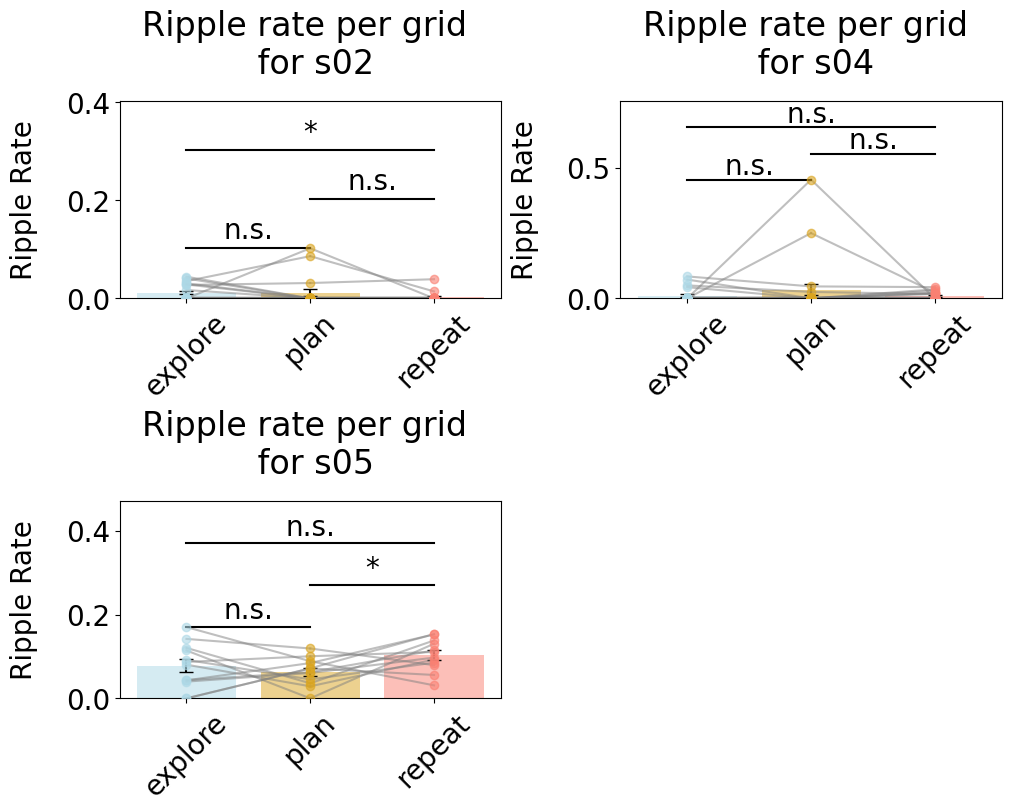

In [20]:
n_sessions = len(stats_df)
colors = ['lightblue','goldenrod', 'salmon']
plt.rcParams.update({'font.size': 20})

#Â dynamically compute rows and columns of subplots
n_rows, n_cols = math.ceil(n_sessions / math.ceil(n_sessions**0.5)), math.ceil(n_sessions**0.5)
# Create figure and axis
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4), constrained_layout=True)
axes = axes.flatten()
    
for idx, row in stats_df.iterrows():
    ax = axes[idx]
    # Plot the bars
    ax.bar(row['means'].keys(), row['means'].values(), yerr=row['sems'].values(), capsize=5, color=colors, alpha=0.5)
    
    # Prepare plotting the scatter points for individual data points (i.e. ripple rates per task)
    data_curr_sesh = ripple_rates_df[ripple_rates_df['session']==row['session']]
    ripple_rate_curr_sesh_phase= []
    for idx_p, phase in enumerate(row['means'].keys()):
        ripple_rate_curr_sesh_phase.append(data_curr_sesh[data_curr_sesh['phase']==phase]['ripple_rate'].values)
        ax.scatter(np.ones(len(ripple_rate_curr_sesh_phase[idx_p]))*idx_p, ripple_rate_curr_sesh_phase[idx_p], color=colors[idx_p], alpha=0.6, zorder=3)
    
    #Â connect the ripple rate datapoint of each task across phases to demonstrate trajectory
    n_tasks = len(ripple_rate_curr_sesh_phase[0])
    for i_task in range(n_tasks):
        ax.plot([0, 1], [ripple_rate_curr_sesh_phase[0][i_task], ripple_rate_curr_sesh_phase[1][i_task]], color='gray', alpha=0.5, zorder=2)
        ax.plot([1, 2], [ripple_rate_curr_sesh_phase[1][i_task], ripple_rate_curr_sesh_phase[2][i_task]], color='gray', alpha=0.5, zorder=2)


    # for i_task, ripple_rate_in_task in enumerate(ripple_rate_curr_sesh_phase[idx]):
    #     ax.plot([0,1], [ripple_rate_curr_sesh_phase[0][i_task], ripple_rate_curr_sesh_phase[1][i_task]], color='gray', alpha=0.5, zorder=2)  # Connecting lines
    #     ax.plot([1,2], [ripple_rate_curr_sesh_phase[1][i_task], ripple_rate_curr_sesh_phase[2][i_task]], color='gray', alpha=0.5, zorder=2)  # Connecting lines
        
    

    # Compute max y for star placement
    all_vals = np.concatenate(ripple_rate_curr_sesh_phase)
    y_max = all_vals.max()
    
    # Draw line and star between plan and first_correct solve (plan)
    ax.plot([0, 1], [y_max]*2, color='black')
    ax.text(0.5, y_max + 0.02, p_to_star(row['t_explore_vs_plan_p']), ha='center')

    # Draw line and star between first_correct_rate and all_reps_rate
    ax.plot([1, 2], [y_max + 0.1]*2, color='black')
    ax.text(1.5, y_max + 0.12, p_to_star(row['t_plan_vs_repeat_p']), ha='center')

    # Draw line and star between find_ABCD_rate and all_reps_rate
    ax.plot([0, 2], [y_max + 0.2]*2, color='black')
    ax.text(1.0, y_max + 0.22, p_to_star(row['t_explore_vs_repeat_p']), ha='center')

    
    #Â final plot adjustments
    # Adjust y-limits to accommodate lines and stars
    ax.set_ylim(0, y_max + 0.3)

    # Adding labels
    ax.set_ylabel('Ripple Rate', labelpad=20)
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(['explore', 'plan', 'repeat'], rotation=45)
    ax.set_title(f"Ripple rate per grid \n for {row['session']}", pad=20)
    #ax.tight_layout()
    
# Turn off unused axes
for j in range(idx+1, len(axes)):
    axes[j].axis('off')

# Show the plot
plt.show()
  

In [21]:
# ripple_rates_df contains trial-level data: session, phase, ripple_rate
model = smf.mixedlm("ripple_rate ~ phase", data=ripple_rates_df, groups="session")
result = model.fit()
print(result.summary())



          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: ripple_rate
No. Observations: 165     Method:             REML       
No. Groups:       3       Scale:              0.0023     
Min. group size:  36      Log-Likelihood:     253.2593   
Max. group size:  72      Converged:          Yes        
Mean group size:  55.0                                   
---------------------------------------------------------
                 Coef. Std.Err.   z   P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept        0.033    0.024 1.395 0.163 -0.013  0.079
phase[T.plan]    0.007    0.009 0.717 0.473 -0.011  0.024
phase[T.repeat]  0.002    0.009 0.188 0.851 -0.016  0.020
session Var      0.002    0.033                          



/Users/xpsy1114/miniconda3/envs/env_multiple_clocks/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


/Users/xpsy1114/miniconda3/envs/env_multiple_clocks/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/Users/xpsy1114/miniconda3/envs/env_multiple_clocks/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


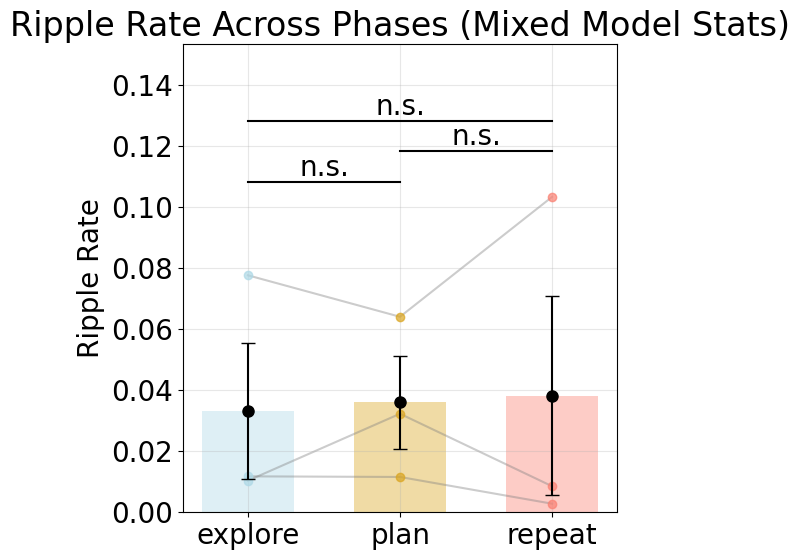

In [22]:
colors = ['lightblue', 'goldenrod', 'salmon']
phases = ['explore', 'plan', 'repeat']

# Pivot to wide format: one row per session
pivot_df = ripple_rates_df.pivot_table(index='session', columns='phase', values='ripple_rate')

# ðŸ”¹ Filter out sessions with all-zero ripple rates
pivot_df = pivot_df[(pivot_df != 0).any(axis=1)]
valid_sessions = pivot_df.index
filtered_df = ripple_rates_df[ripple_rates_df['session'].isin(valid_sessions)]

# ðŸ”¹ Fit mixed-effects model with explore as baseline
model1 = smf.mixedlm("ripple_rate ~ phase", data=filtered_df, groups="session")
res1 = model1.fit()

# ðŸ”¹ Refit with 'plan' as baseline to get plan vs repeat
df_plan_ref = filtered_df.copy()
df_plan_ref['phase'] = pd.Categorical(df_plan_ref['phase'], categories=['plan', 'explore', 'repeat'], ordered=True)
model2 = smf.mixedlm("ripple_rate ~ phase", data=df_plan_ref, groups="session")
res2 = model2.fit()

# ðŸ”¹ Get p-values from model
p_ep_plan = res1.pvalues['phase[T.plan]']
p_ep_repeat = res1.pvalues['phase[T.repeat]']
p_plan_repeat = res2.pvalues['phase[T.repeat]']

# Plotting
x = np.arange(len(phases))  # [0, 1, 2]
plt.figure(figsize=(6, 6))

# Connect lines per session
for _, row in pivot_df.iterrows():
    plt.plot(x, row.values, color='gray', alpha=0.4, zorder=1)

# Scatter individual session points
for i, phase in enumerate(phases):
    y = pivot_df[phase].values
    plt.scatter([i] * len(y), y, color=colors[i], zorder=2, alpha=0.7)

# Transparent bars for mean
means = pivot_df.mean()
sems = pivot_df.sem()
for i, phase in enumerate(phases):
    plt.bar(i, means[phase], width=0.6, color=colors[i], alpha=0.4, zorder=0)

# Mean Â± SEM error bars
plt.errorbar(x, means, yerr=sems, fmt='o', color='black', capsize=5, markersize=8, zorder=3)

# Axes & labels
plt.xticks(x, phases)
plt.ylabel('Ripple Rate')
plt.title('Ripple Rate Across Phases (Mixed Model Stats)')
plt.grid(alpha=0.3)

# Significance stars from model p-values
def p_to_star(p):
    if p < 0.001: return '***'
    elif p < 0.01: return '**'
    elif p < 0.05: return '*'
    else: return 'n.s.'

y_max = pivot_df.max().max()

plt.plot([0, 1], [y_max + 0.005] * 2, color='black')
plt.text(0.5, y_max + 0.007, p_to_star(p_ep_plan), ha='center')

plt.plot([1, 2], [y_max + 0.015] * 2, color='black')
plt.text(1.5, y_max + 0.017, p_to_star(p_plan_repeat), ha='center')

plt.plot([0, 2], [y_max + 0.025] * 2, color='black')
plt.text(1.0, y_max + 0.027, p_to_star(p_ep_repeat), ha='center')

plt.ylim(0, y_max + 0.05)
plt.tight_layout()
plt.show()


In [23]:
# Create output directory with today's date
today = datetime.today().strftime('%Y-%m-%d')
out_dir = f"./figures/{today}"
os.makedirs(out_dir, exist_ok=True)

# File paths
png_path = os.path.join(out_dir, "ripple_rate_summary.png")
svg_path = os.path.join(out_dir, "ripple_rate_summary.svg")

# Save figures
plt.savefig(png_path, dpi=300)       # High-res raster image
plt.savefig(svg_path, format='svg')  # Vector format

print(f"Figure saved to:\n- {png_path}\n- {svg_path}")



Figure saved to:
- ./figures/2025-07-21/ripple_rate_summary.png
- ./figures/2025-07-21/ripple_rate_summary.svg


<Figure size 640x480 with 0 Axes>

In [24]:
#Â compute stats collapsed across all sessions.
# Group all by phase, ignoring session
collapsed_summary = ripple_rates_df.groupby('phase')['ripple_rate'].agg(['mean', 'sem']).reset_index()

# Pairwise t-tests (all data)
explore_rates = ripple_rates_df[ripple_rates_df['phase'] == 'explore']['ripple_rate']
plan_rates = ripple_rates_df[ripple_rates_df['phase'] == 'plan']['ripple_rate']
repeat_rates = ripple_rates_df[ripple_rates_df['phase'] == 'repeat']['ripple_rate']

t_explore_plan = stats.ttest_rel(explore_rates, plan_rates)
t_plan_repeat = stats.ttest_rel(plan_rates, repeat_rates)
t_explore_repeat = stats.ttest_rel(explore_rates, repeat_rates)

collapsed_stats = {
    'means': collapsed_summary.set_index('phase')['mean'].to_dict(),
    'sems': collapsed_summary.set_index('phase')['sem'].to_dict(),
    't_explore_vs_plan_p': t_explore_plan.pvalue,
    't_plan_vs_repeat_p': t_plan_repeat.pvalue,
    't_explore_vs_repeat_p': t_explore_repeat.pvalue
}

stats_collapsed_seshs_df = pd.DataFrame(collapsed_stats)
stats_collapsed_seshs_df.head()

from pprint import pprint
print("\nCollapsed stats across sessions:")
pprint(collapsed_stats)


Collapsed stats across sessions:
{'means': {'explore': 0.025538030358923155,
           'plan': 0.0320716672661802,
           'repeat': 0.027249491742002387},
 'sems': {'explore': 0.005586586409142437,
          'plan': 0.009972894090068473,
          'repeat': 0.0061013004587902},
 't_explore_vs_plan_p': 0.5437848946953705,
 't_explore_vs_repeat_p': 0.7584149081776542,
 't_plan_vs_repeat_p': 0.6490719193946257}


In [41]:
phases = beh_df[beh_df['grid_no'] == grid]
print(beh_df)
[print(grid)]

     rep_correct       t_A       t_B       t_C       t_D  loc_A  loc_B  loc_C  \
0              0    18.488    28.378    35.198    55.267      6      4      2   
1              0    69.188    77.017    86.888   139.340      6      4      2   
2              0   169.590   176.220   184.550   186.030      6      4      2   
3              0   215.600   222.430   226.490   227.700      6      4      2   
4              0   235.190   241.690   296.030   304.290      6      4      2   
..           ...       ...       ...       ...       ...    ...    ...    ...   
147            5  2767.400  2768.600  2769.600  2771.000      5      8      9   
148            6  2773.800  2774.800  2776.200  2778.000      5      8      9   
149            7  2782.100  2782.900  2783.700  2785.200      5      8      9   
150            8  2787.600  2788.600  2789.800  2792.000      5      8      9   
151            9  2794.600  2795.500  2796.900  2798.600      5      8      9   

     loc_D  rep_overall  ne

[None]

In [42]:
all_results = []           # For aggregated ripple rates per phase
normalized_ripples = []    # For individual ripple events (normalized)

for sesh in beh:
    # Standardize grid_no
    beh_phases[sesh]['grid_no'] = beh_phases[sesh]['grid_no'].astype(str)
    ripple_events[sesh]['grid_no'] = ripple_events[sesh]['grid_no'].str.extract(r'(\d+)')
    ripple_events[sesh]['grid_no'] = ripple_events[sesh]['grid_no'].astype(str)

    results = []
    for _, phase_row in beh_phases[sesh].iterrows():
        grid = phase_row['grid_no']
        phase = phase_row['phase']
        start = phase_row['start']
        end = phase_row['end']
        duration = phase_row['duration']

        # Find ripples in this phase
        ripples_in_phase = ripple_events[sesh][
            (ripple_events[sesh]['grid_no'] == grid) &
            (ripple_events[sesh]['onset_in_secs'] >= start) &
            (ripple_events[sesh]['onset_in_secs'] < end)
        ]

        ripple_count = len(ripples_in_phase)
        rate = ripple_count / duration if duration > 0 else 0

        # Add to summary table
        results.append({
            'session': sesh,
            'grid_no': grid,
            'phase': phase,
            'ripple_count': ripple_count,
            'duration': duration,
            'ripple_rate': rate
        })

        # Normalize each ripple for the KDE plot
        norm_start = {'explore': 0, 'plan': 1/3, 'repeat': 2/3}.get(phase)
        for _, ripple in ripples_in_phase.iterrows():
            norm_time = ((ripple['onset_in_secs'] - start) / duration) * (1/3) + norm_start
            normalized_ripples.append(norm_time)

    all_results.append(pd.DataFrame(results))

# Create summary and ripple-level DataFrames
ripple_rates_df = pd.concat(all_results, ignore_index=True)
normalized_ripples = np.array(normalized_ripples, dtype=np.float64)


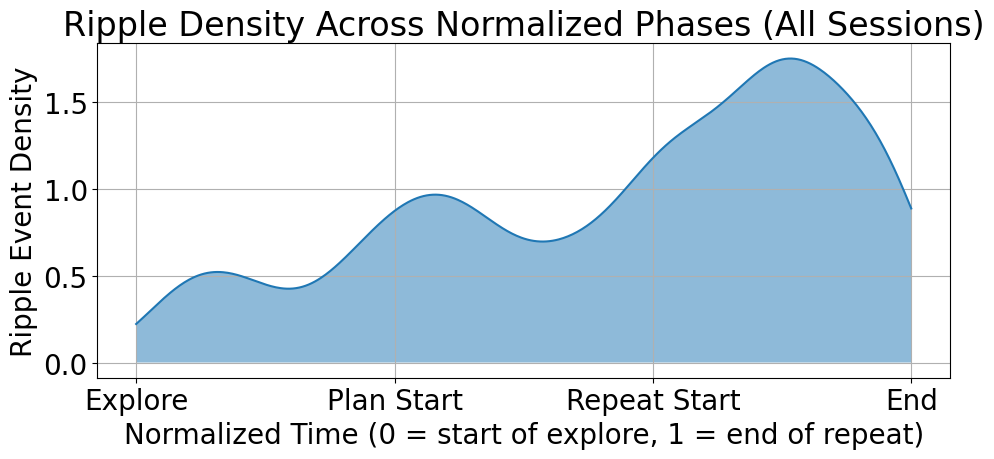

In [45]:
len(normalized_ripples)
# Convert to NumPy array
normalized_array = np.array(normalized_ripples, dtype=np.float64)

# Compute and plot KDE
kde = gaussian_kde(normalized_array, bw_method=0.2)
x_grid = np.linspace(0, 1, 500)
kde_values = kde(x_grid)

# Plot
plt.figure(figsize=(10, 5))
plt.fill_between(x_grid, kde_values, alpha=0.5)
plt.plot(x_grid, kde_values)
plt.xlabel('Normalized Time (0 = start of explore, 1 = end of repeat)')
plt.ylabel('Ripple Event Density')
plt.title('Ripple Density Across Normalized Phases (All Sessions)')
plt.xticks([0, 1/3, 2/3, 1], ['Explore', 'Plan Start', 'Repeat Start', 'End'])
plt.grid(True)
plt.tight_layout()
plt.show()

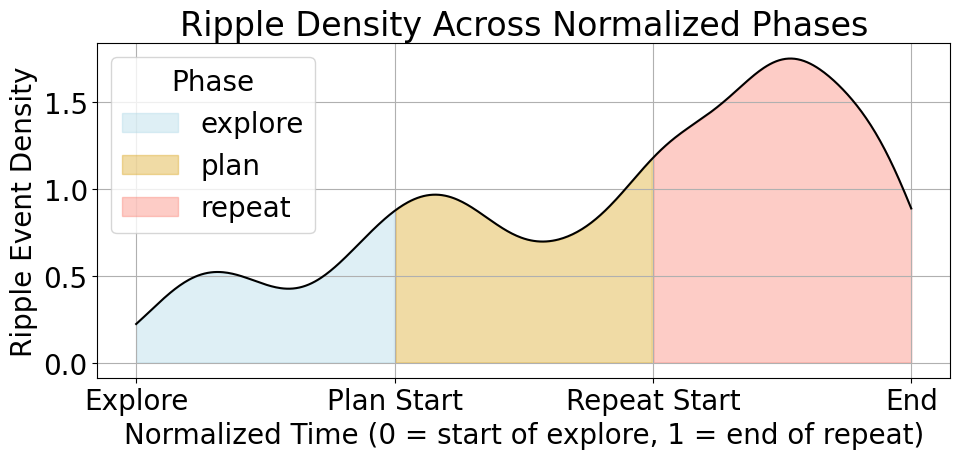

In [46]:
# Define phase boundaries and colors
colors = ['lightblue', 'goldenrod', 'salmon']
phases = ['explore', 'plan', 'repeat']
phase_edges = [(0, 1/3), (1/3, 2/3), (2/3, 1)]

# Recompute KDE
kde = gaussian_kde(normalized_ripples, bw_method=0.2)
x_grid = np.linspace(0, 1, 500)
kde_values = kde(x_grid)

# Plot
plt.figure(figsize=(10, 5))

# Fill each phase region with its color
for (start, end), color, phase in zip(phase_edges, colors, phases):
    mask = (x_grid >= start) & (x_grid <= end)
    plt.fill_between(x_grid[mask], kde_values[mask], color=color, alpha=0.4, label=phase)

# Overlay full KDE curve
plt.plot(x_grid, kde_values, color='black')
plt.xlabel('Normalized Time (0 = start of explore, 1 = end of repeat)')
plt.ylabel('Ripple Event Density')
plt.title('Ripple Density Across Normalized Phases')
plt.xticks([0, 1/3, 2/3, 1], ['Explore', 'Plan Start', 'Repeat Start', 'End'])
plt.grid(True)
plt.legend(title='Phase')
plt.tight_layout()
plt.show()

In [ ]:
# ripple plotting function.
# requires the raw snippet, the event timings, and the power.


plot_ripple(freq_to_plot, title, downsampled_data, event, min_length_ripple, filtered_cropped_vhgamma_np, power_dict, repeat, freq_bands_keys, y_label_power, for_publication = False):

downsampled_data = load_snippet(snippet_name)
    
x = np.arange(-freq_to_plot, freq_to_plot) * 2
    

plt.rcParams.update({'font.size': 20})
fig, axs = plt.subplots(2)
# here, plot only 40ms before and after the event
no_of_samples = 0.03*freq_to_plot
x = np.arange(-no_of_samples, no_of_samples) * 2
freq_to_plot = int(no_of_samples)


# only plot half of this:
# freq_to_plot = freq_to_plot/2
# Create x-values from 5500 to 9500
# x = np.linspace(event[0]-freq_to_plot, event[0]+freq_to_plot-1, freq_to_plot*2)


# the fifth subplot is the overall power spectrum
# power_to_plot_all = np.stack(power_all[freq_bands_keys[0]][event[-1], :, event[0]-sampling_freq:event[0]+sampling_freq], power_all[freq_bands_keys[1]][event[-1], :, event[0]-sampling_freq:event[0]+sampling_freq], power_all[freq_bands_keys[2]][event[-1], :, event[0]-sampling_freq:event[0]+sampling_freq])
power_to_plot_all = np.vstack((power_dict[f"{repeat}_stepwise"][freq_bands_keys[0]][event[-1], :, event[0]-freq_to_plot:event[0]+freq_to_plot], power_dict[f"{repeat}_stepwise"][freq_bands_keys[1]][event[-1], :, event[0]-freq_to_plot:event[0]+freq_to_plot]))
power_to_plot_all = np.vstack((power_to_plot_all, power_dict[f"{repeat}_stepwise"][freq_bands_keys[2]][event[-1], :, event[0]-freq_to_plot:event[0]+freq_to_plot]))
power_to_plot_all = np.vstack((power_to_plot_all, power_dict[f"{repeat}_stepwise"][freq_bands_keys[3]][event[-1], :, event[0]-freq_to_plot:event[0]+freq_to_plot]))
y_ticks = [5, 25, 45, 65, power_to_plot_all.shape[0] - 1]  # 5, 25, 45, 65 and the max value (y-axis max)


axs[1].set_title('downsampled raw LFP', pad=20)
axs[1].set_xlabel('Time (ms)')
# set a few x-ticks around the ripple in 20ms resolution. 
axs[1].plot(x, downsampled_data[event[0]-freq_to_plot:event[0]+freq_to_plot, event[-1]], linewidth = 2, color='black')
axs[1].set_xticks(np.arange(0-3*min_length_ripple, 4*min_length_ripple, 1.5*min_length_ripple))  # Set x-ticks from 0 to 10 with a step of 0.5

axs[0].imshow(power_to_plot_all, aspect='auto', origin='lower')
axs[0].set_xticks([])
# Setting the yticks and the labels
axs[0].set_title('power spectrum', pad = 20)
axs[0].set_yticks(y_ticks[:-1])  # Add the desired tick positions except the last one
axs[0].set_yticks([y_ticks[-1]], minor=True)  # Add the max position as a minor tick
axs[0].set_yticklabels(y_label_power)  # Add the desired tick labels